In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stumbleupon/test.tsv
/kaggle/input/stumbleupon/train.tsv
/kaggle/input/stumbleupon/sampleSubmission.csv
/kaggle/input/stumbleupon/raw_content.zip


In [2]:
# file with tab separetor 
df = pd.read_csv('../input/stumbleupon/train.tsv', sep='\t')
df.head()

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,1,1,40,0,4973,187,9,0.181818,0.125448,1
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,...,1,1,55,0,2240,258,11,0.166667,0.057613,1
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,...,1,0,24,0,2737,120,5,0.041667,0.100858,1
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,...,1,1,14,0,12032,162,10,0.098765,0.082569,0


# Data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             7395 non-null   object 
 1   urlid                           7395 non-null   int64  
 2   boilerplate                     7395 non-null   object 
 3   alchemy_category                7395 non-null   object 
 4   alchemy_category_score          7395 non-null   object 
 5   avglinksize                     7395 non-null   float64
 6   commonlinkratio_1               7395 non-null   float64
 7   commonlinkratio_2               7395 non-null   float64
 8   commonlinkratio_3               7395 non-null   float64
 9   commonlinkratio_4               7395 non-null   float64
 10  compression_ratio               7395 non-null   float64
 11  embed_ratio                     7395 non-null   float64
 12  framebased                      73

In [4]:
df.describe()

,urlid,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,...,html_ratio,image_ratio,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
count,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.0,7395.000000,...,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000
mean,5305.704665,2.761823,0.468230,0.214080,0.092062,0.049262,2.255103,-0.103750,0.0,0.056423,...,0.233778,0.275709,0.660311,30.077079,5716.598242,178.754564,4.960649,0.172864,0.101221,0.513320
std,3048.384114,8.619793,0.203133,0.146743,0.095978,0.072629,5.704313,0.306545,0.0,0.041446,...,0.052487,1.919320,0.473636,20.393101,8875.432430,179.466198,3.233111,0.183286,0.079231,0.499856
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.0,0.000000,...,0.045564,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2688.500000,1.602062,0.340370,0.105263,0.022222,0.000000,0.442616,0.000000,0.0,0.028502,...,0.201061,0.025900,0.000000,14.000000,1579.000000,82.000000,3.000000,0.040984,0.068739,0.000000
50%,5304.000000,2.088235,0.481481,0.202454,0.068627,0.022222,0.483680,0.000000,0.0,0.045775,...,0.230564,0.083051,1.000000,25.000000,3500.000000,139.000000,5.000000,0.113402,0.089312,1.000000
75%,7946.500000,2.627451,0.616604,0.300000,0.133333,0.065065,0.578227,0.000000,0.0,0.073459,...,0.260770,0.236700,1.000000,43.000000,6377.000000,222.000000,7.000000,0.241299,0.112376,1.000000
max,10566.000000,363.000000,1.000000,1.000000,0.980392,0.980392,21.000000,0.250000,0.0,0.444444,...,0.716883,113.333333,1.000000,100.000000,207952.000000,4997.000000,22.000000,1.000000,1.000000,1.000000


In [5]:
# determine the values of label
df['label'].unique()

array([0, 1])

array([[<AxesSubplot:title={'center':'urlid'}>,
        <AxesSubplot:title={'center':'avglinksize'}>,
        <AxesSubplot:title={'center':'commonlinkratio_1'}>,
        <AxesSubplot:title={'center':'commonlinkratio_2'}>,
        <AxesSubplot:title={'center':'commonlinkratio_3'}>],
       [<AxesSubplot:title={'center':'commonlinkratio_4'}>,
        <AxesSubplot:title={'center':'compression_ratio'}>,
        <AxesSubplot:title={'center':'embed_ratio'}>,
        <AxesSubplot:title={'center':'framebased'}>,
        <AxesSubplot:title={'center':'frameTagRatio'}>],
       [<AxesSubplot:title={'center':'hasDomainLink'}>,
        <AxesSubplot:title={'center':'html_ratio'}>,
        <AxesSubplot:title={'center':'image_ratio'}>,
        <AxesSubplot:title={'center':'lengthyLinkDomain'}>,
        <AxesSubplot:title={'center':'linkwordscore'}>],
       [<AxesSubplot:title={'center':'non_markup_alphanum_characters'}>,
        <AxesSubplot:title={'center':'numberOfLinks'}>,
        <AxesSubplot:tit

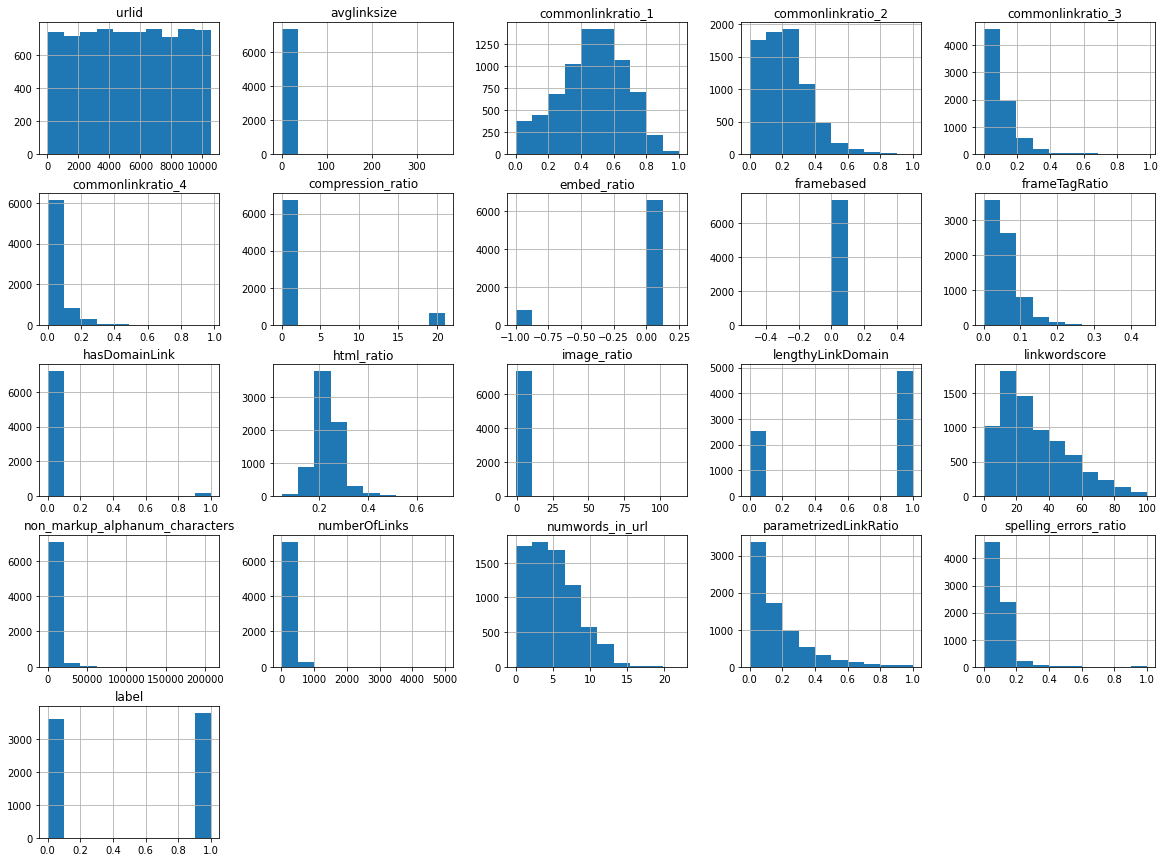

In [6]:
# visualize the features
df.hist(figsize=(20,15))

In [7]:
# the feature framebased have a single value which is 0
df['framebased'].unique()

array([0])

In [8]:
# delete the columns framebased and urlid from the dataset
df.drop('framebased', axis=1, inplace= True)
df.drop('urlid', axis=1, inplace= True)
# change the value ? by 0 in is_news features and change its type to integer
df['is_news'] = df['is_news'].str.replace('?', '0').astype(int)
df.head(3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


,url,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,...,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,...,1,1,40,0,4973,187,9,0.181818,0.125448,1
2,http://www.menshealth.com/health/flu-fighting-...,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,...,1,1,55,0,2240,258,11,0.166667,0.057613,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             7395 non-null   object 
 1   boilerplate                     7395 non-null   object 
 2   alchemy_category                7395 non-null   object 
 3   alchemy_category_score          7395 non-null   object 
 4   avglinksize                     7395 non-null   float64
 5   commonlinkratio_1               7395 non-null   float64
 6   commonlinkratio_2               7395 non-null   float64
 7   commonlinkratio_3               7395 non-null   float64
 8   commonlinkratio_4               7395 non-null   float64
 9   compression_ratio               7395 non-null   float64
 10  embed_ratio                     7395 non-null   float64
 11  frameTagRatio                   7395 non-null   float64
 12  hasDomainLink                   73

In [10]:
df.groupby('alchemy_category').label.agg(['mean', 'count']).sort_values('count', ascending=False)

,mean,count
alchemy_category,,
?,0.502135,2342
recreation,0.684296,1229
arts_entertainment,0.371945,941
business,0.711364,880
health,0.573123,506
sports,0.205263,380
culture_politics,0.457726,343
computer_internet,0.246622,296
science_technology,0.456747,289


<AxesSubplot:>

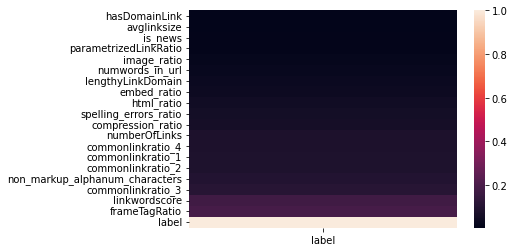

In [11]:
sns.heatmap(df.corr().abs()[['label']].sort_values('label'))

<AxesSubplot:xlabel='label', ylabel='linkwordscore'>

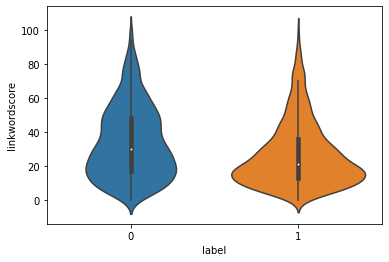

In [12]:
sns.violinplot(x='label',y='linkwordscore', data=df)

In [13]:
# delete the column label
df1 = df.drop('label', axis=1)

In [14]:
# gather the features with type number in a variable
num_feat = df1.select_dtypes(include=[np.number])
num_feat.sample(5)

,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio
504,1.695652,0.739130,0.304348,0.017391,0.000000,0.419686,0.0,0.047312,0,0.290901,0.024668,0,0,22,3557,115,2,0.113043,0.032567
1618,2.361538,0.725352,0.288732,0.140845,0.035211,0.431396,0.0,0.037168,0,0.173447,0.009790,1,1,3,47829,142,8,0.063380,0.106061
1009,2.381356,0.429752,0.231405,0.049587,0.008264,0.451956,0.0,0.084746,0,0.255484,0.036337,0,1,30,3059,121,9,0.322314,0.096070
4405,2.100000,0.700000,0.300000,0.200000,0.100000,21.000000,-1.0,0.069767,0,0.317526,-1.000000,1,0,4,4525,20,5,0.100000,0.142857
3090,1.687000,0.403694,0.248901,0.137203,0.102902,0.439292,0.0,0.035961,0,0.180617,0.603571,1,1,44,8830,1137,4,0.263852,0.083026


In [15]:
# normalising
num_feat = (num_feat - num_feat.mean())/ num_feat.std()

In [16]:
# select columns with type object
cat_feat = df1.select_dtypes(include=[np.object])
cat_feat.sample(5)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,url,boilerplate,alchemy_category,alchemy_category_score,news_front_page
3627,http://www.bbc.co.uk/news/technology-15824288,"{""title"":""BBC News Long lasting all weather ni...",computer_internet,0.538823,0
5137,http://bostonrant.ytmnd.com/,"{""title"":""YTMND Boston Bomb Scare Rant "",""body...",culture_politics,0.49866,0
3711,http://thinknice.com/will-ferrell-landlord-pro...,"{""title"":""Landlord Problems Will Ferrell Meets...",recreation,0.743296,0
2835,http://www.gadgetrance.com/nokia-n800-series-d...,"{""url"":""gadgetrance nokia n800 series device c...",computer_internet,0.611559,0
5168,http://spacedust.atspace.com/private_parking_s...,"{""title"":""funny private parking funny - privat...",recreation,0.760922,0


In [17]:
df.news_front_page.value_counts()

0    5853
?    1248
1     294
Name: news_front_page, dtype: int64

In [18]:
df.alchemy_category_score.value_counts()

?            2342
0.85           82
0.0784091      40
0.849999       12
0.535009       10
             ... 
0.776397        1
0.351398        1
0.642615        1
0.640796        1
0.617876        1
Name: alchemy_category_score, Length: 4806, dtype: int64

In [19]:
df.is_news.value_counts()

1    4552
0    2843
Name: is_news, dtype: int64

In [20]:
# using just the columns alchemy_category and news_front_page in the modeling
cat_feat = cat_feat[['alchemy_category','news_front_page']]
cat_feat.head()

,alchemy_category,news_front_page
0,business,0
1,recreation,0
2,health,0
3,health,0
4,sports,0


In [21]:
# one hot encoding the change the categories features to number
pd.get_dummies(cat_feat)

,alchemy_category_?,alchemy_category_arts_entertainment,alchemy_category_business,alchemy_category_computer_internet,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather,news_front_page_0,news_front_page_1,news_front_page_?
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7391,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7392,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
7393,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [22]:
# Concatenate the two types of features, categorical and numerical
df_f = pd.concat([num_feat,pd.get_dummies(cat_feat)], axis=1)
df_f.columns

Index(['avglinksize', 'commonlinkratio_1', 'commonlinkratio_2',
       'commonlinkratio_3', 'commonlinkratio_4', 'compression_ratio',
       'embed_ratio', 'frameTagRatio', 'hasDomainLink', 'html_ratio',
       'image_ratio', 'is_news', 'lengthyLinkDomain', 'linkwordscore',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio', 'alchemy_category_?',
       'alchemy_category_arts_entertainment', 'alchemy_category_business',
       'alchemy_category_computer_internet',
       'alchemy_category_culture_politics', 'alchemy_category_gaming',
       'alchemy_category_health', 'alchemy_category_law_crime',
       'alchemy_category_recreation', 'alchemy_category_religion',
       'alchemy_category_science_technology', 'alchemy_category_sports',
       'alchemy_category_unknown', 'alchemy_category_weather',
       'news_front_page_0', 'news_front_page_1', 'news_front_page_?'],
      dtype='object')

# Modeling

In [23]:
# features pre-processing.

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

features_df = df.drop('label', axis=1)
FEATURE_COLUMNS = features_df.columns
NUM_FEATURES = features_df.select_dtypes(include=[np.number]).columns
CAT_FEATURES = ['alchemy_category', 'news_front_page']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)),
    ('scaler', StandardScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('one_hot', OneHotEncoder(handle_unknown='ignore')),
])

preprocessor = ColumnTransformer(
  transformers=[
      ('num', numeric_transformer, NUM_FEATURES),
      ('cat', categorical_transformer, CAT_FEATURES)
  ])

In [24]:
features_df = preprocessor.fit_transform(df.drop('label', axis=1))
features_df.shape

(7395, 36)

In [25]:
label = df['label']
label.shape

(7395,)

In [26]:
# split our dataset
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(df_f, label, test_size= 0.25)

In [27]:
x_train.shape

(5546, 36)

In [28]:
x_test.shape

(1849, 36)

In [29]:
# using Logistic RegressionCV
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV()

In [30]:
model.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegressionCV()

In [31]:
model.predict(x_train).mean()

0.5838442120447169

In [32]:
y_train.mean()

0.5162279120086549

In [33]:
model_pred = model.predict(x_test)

In [34]:
# evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.67      0.58      0.62       916
           1       0.64      0.72      0.68       933

    accuracy                           0.65      1849
   macro avg       0.65      0.65      0.65      1849
weighted avg       0.65      0.65      0.65      1849



In [35]:
# using random forest classifier
from sklearn.ensemble import RandomForestClassifier
modelR = RandomForestClassifier()

In [36]:
modelR.fit(x_train, y_train)

RandomForestClassifier()

In [37]:
modelR_predictions = modelR.predict(x_test)

In [38]:
# evaluation
print(classification_report(y_test, modelR_predictions))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71       916
           1       0.71      0.71      0.71       933

    accuracy                           0.71      1849
   macro avg       0.71      0.71      0.71      1849
weighted avg       0.71      0.71      0.71      1849



# submission

In [39]:
test_df = pd.read_csv('../input/stumbleupon/test.tsv', sep='\t')
test_df['is_news'] = test_df['is_news'].str.replace('?', '0').astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [40]:
test_features = preprocessor.transform(test_df[df.drop('label', axis=1).columns])
predictions = modelR.predict(test_features)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [41]:
sub_df = pd.DataFrame({'urlid' : test_df.urlid, 'label': predictions})
sub_df.head()

,urlid,label
0,5865,1
1,782,0
2,6962,0
3,7640,0
4,3589,0


In [42]:
sub_df.to_csv('submission.csv', index=False)